# Прототип модели машинного обучения для «Цифры»

**Введение**

Для исследования предоставлены данные о технологическом процесе добычи золота из руды: 

* `gold_recovery_train_new.csv` — обучающая выборка;


* `gold_recovery_test_new.csv` — тестовая выборка;


* `gold_recovery_full_new.csv` — исходные данные.

**Цель исследования**

Подготовьте прототип модели, предсказывающей коэффициент восстановления золота из золотосодержащей руды.

**Ход исследования** 

1. Подготовить данные


2. Проанализировать данные


3. Построить модель


4. Написать вывод

**Информация о стоблцах**

*Технологический процесс*

* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate **— ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

*Параметры этапов*

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

## Подготовка данных

Подключим все необходимые библиотеки. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import os 
import pandas as pd
from sklearn.metrics import mean_absolute_error 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

Откроем файлы и изучим их.

In [2]:
pth_1 = '/datasets/gold_recovery_train_new.csv'
pth_2 = '/datasets/gold_recovery_test_new.csv'
pth_3 = '/datasets/gold_recovery_full_new.csv'

pth_1_1 = 'gold_recovery_train_new.csv'
pth_2_1 = 'gold_recovery_test_new.csv'
pth_3_1 = 'gold_recovery_full_new.csv'

if (os.path.exists(pth_1) and 
    os.path.exists(pth_2) and 
    os.path.exists(pth_3)):
    
    data_train = pd.read_csv(pth_1)
    data_test = pd.read_csv(pth_2)
    data_full = pd.read_csv(pth_3)
    
else:
    
    data_train = pd.read_csv(pth_1_1)
    data_test = pd.read_csv(pth_2_1)
    data_full = pd.read_csv(pth_3_1)

Данные успешно загружены. Выведем информацию. 

In [3]:
for data in [data_train, data_test, data_full]:

    
    display(data.head(5))
    display(data.info())
    print("\n------------------------------------------------------------------------------------------------------------")

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None


------------------------------------------------------------------------------------------------------------


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None


------------------------------------------------------------------------------------------------------------


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None


------------------------------------------------------------------------------------------------------------


Проверим правильность рассчета эффективности обогащения. Напишем функцию для расчета.

In [4]:
def enrichment_efficiency(data):
    c = data['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
    f = data['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
    t = data['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки
    
    return ((c*(f-t)) / (f*(c-t)) *100) # формула для расчета эффективности

In [5]:
ench_efficiency = data_train.apply(enrichment_efficiency, axis = 1)

In [6]:
ench_efficiency_mae = mean_absolute_error(ench_efficiency, data_train['rougher.output.recovery'])
print(f'MAE enrichment_efficiency: {ench_efficiency_mae}')

MAE enrichment_efficiency: 9.73512347450521e-15


Ошибка минимальна, вычисления верны.

Проанализируем признаки, недоступные в тестовой выборке.

In [7]:
missed_signs = set(data_train.columns) - set(data_test.columns)
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видно, что в тестовой выборке отсутсвуют столбцы с выходными парметрами(`output`) и вычислениями(`calculation`) продукта на каждом этапе. Также в тестовой выборки отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`, добавим их в тестовую выборку.

In [8]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

**Предобработка данных**

Проведем предобработку данных, которые содержутся в переменной `data_train` и `data_test`, так как эти данные будут использоваться при обучении.
Проверим на наличие:

* дубликатов 

* пропусков

* неверных типов

* правильность регистра

**Дубликаты**

In [9]:
print(f'Количество дубликатов в data_train: {data_train.duplicated().sum()}')
print(f'Количество дубликатов в data_test: {data_train.duplicated().sum()}')

Количество дубликатов в data_train: 0
Количество дубликатов в data_test: 0


Дубликаты отсутсвтуют.

**Пропуски**

Выведем пропуски.

In [10]:
isna_data_train = (data_train.isna().sum() > 0)
display(isna_data_train[isna_data_train.values == True])

print('------------------------------------------------')

isna_data_test = (data_test.isna().sum() > 0)
display(isna_data_test[isna_data_test.values == True])

final.output.concentrate_ag                   True
final.output.concentrate_pb                   True
final.output.concentrate_sol                  True
final.output.tail_pb                          True
final.output.tail_sol                         True
                                              ... 
secondary_cleaner.state.floatbank5_a_level    True
secondary_cleaner.state.floatbank5_b_air      True
secondary_cleaner.state.floatbank5_b_level    True
secondary_cleaner.state.floatbank6_a_air      True
secondary_cleaner.state.floatbank6_a_level    True
Length: 62, dtype: bool

------------------------------------------------


primary_cleaner.input.sulfate               True
primary_cleaner.input.depressant            True
primary_cleaner.input.xanthate              True
rougher.input.feed_rate                     True
rougher.input.feed_size                     True
rougher.input.feed_sol                      True
rougher.input.floatbank10_sulfate           True
rougher.input.floatbank11_sulfate           True
rougher.input.floatbank11_xanthate          True
secondary_cleaner.state.floatbank2_a_air    True
secondary_cleaner.state.floatbank2_b_air    True
secondary_cleaner.state.floatbank3_a_air    True
dtype: bool

Из условия, что `cоседние по времени параметры часто похожи`, можно сделать заполнение пропусков предыдущем значением, предварительно отсортировав данные по столбцу `date`

In [11]:
data_train = data_train.sort_values(by = 'date')
data_test = data_test.sort_values(by = 'date')

data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

Столбец `date` нам больше не понадобится, удалим его. 

In [12]:
data_train = data_train.drop('date', axis = 1)
data_test = data_test.drop('date', axis = 1)

Проверим оставшиеся пропуски.

In [13]:
isna_data_train = (data_train.isna().sum() > 0)
display(isna_data_train[isna_data_train.values == True])

print('------------------------------------------------')

isna_data_test = (data_test.isna().sum() > 0)
display(isna_data_test[isna_data_test.values == True])

Series([], dtype: bool)

------------------------------------------------


Series([], dtype: bool)

Пропусков большен нет.

**Неверные типы**

In [14]:
display(data_train.info())

print('------------------------------------------------')

display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


None

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_l

None

Все типы корректны!

**Правильность регистра** 

Все сторлбцы приведены к нижнему регистру. 

## Анализирование данных

In [15]:
list(data_train.columns)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floa

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Изначальное сырье – **rougher.input**

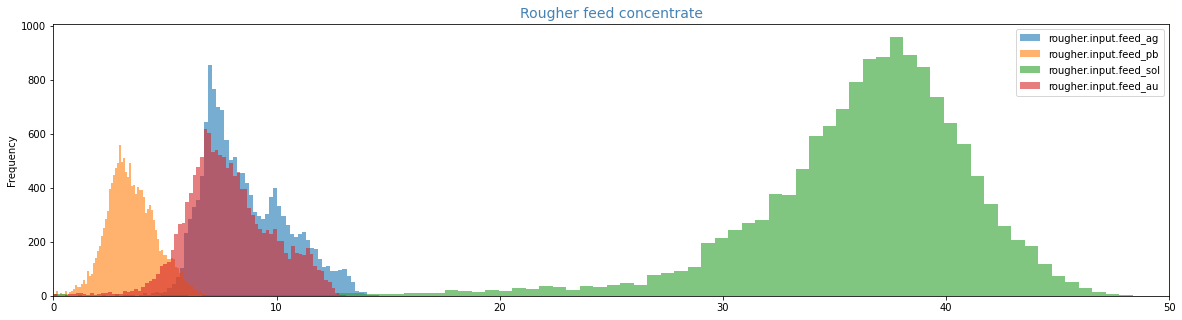

In [16]:
for concentrate in ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']:
    (
    data_train[concentrate].plot(kind='hist', bins = 80,  figsize=(20,5), legend = concentrate, alpha = 0.6, xlim = (0, 50))
        .set_title('Rougher feed concentrate', fontsize = 14, color = 'SteelBlue')
    );

Превый этап флотация – **rougher**

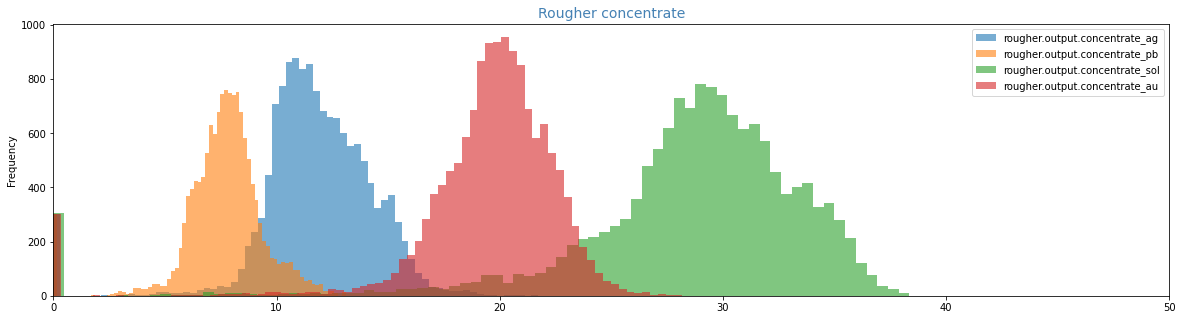

In [17]:
for concentrate in ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']:
    (
    data_train[concentrate].plot(kind='hist', bins = 80,  figsize=(20,5), legend = concentrate, alpha = 0.6, xlim = (0, 50))
        .set_title('Rougher concentrate', fontsize = 14, color = 'SteelBlue')
    );

Второй этап первичная отчистка – **primary_cleaner**

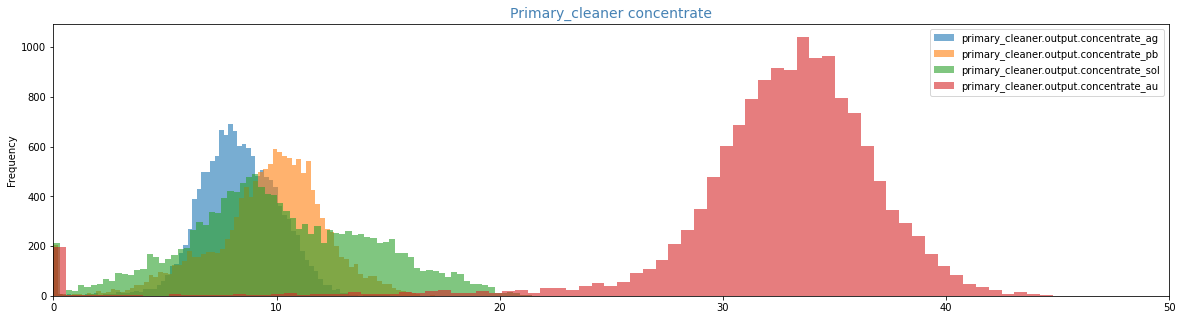

In [18]:
for concentrate in ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']:
    (
    data_train[concentrate].plot(kind='hist', bins = 80,  figsize=(20,5), legend = concentrate, alpha = 0.6, xlim = (0, 50))
        .set_title('Primary_cleaner concentrate', fontsize = 14, color = 'SteelBlue')
    );

Третий этап финальная очистка – **final_cleaner**

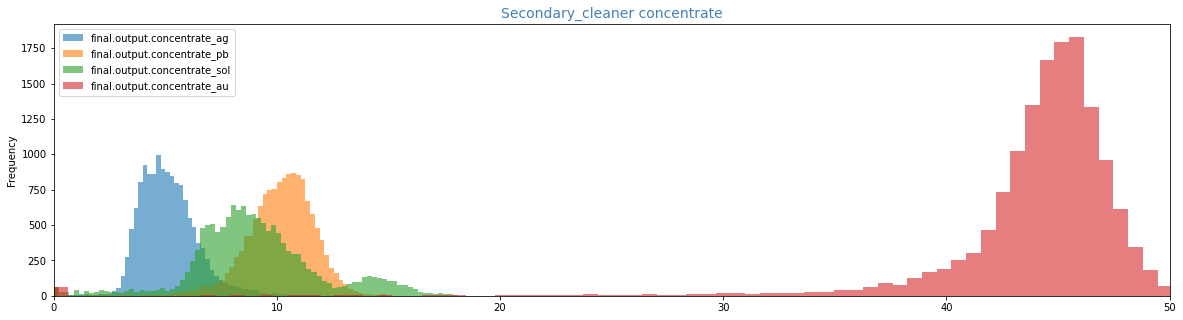

In [19]:
for concentrate in ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']:
    (
    data_train[concentrate].plot(kind='hist', bins = 80,  figsize=(20,5), legend = concentrate, alpha = 0.6, xlim = (0, 50))
        .set_title('Secondary_cleaner concentrate', fontsize = 14, color = 'SteelBlue')
    );

**Вывод:**

Значения концентратов металлов на каждом этапе распределены `нормально`, но имеются аномальные выбросы, которые необходимо удалить, так как они будут мешать обучению.

В ходе очистки наблюдаются следующие тенденции:

* концентрация `au` с каждым этапом увеличивается;

* концентрация `sol` уменьшается; 

* концентрация `pb`,`ag` варируется от 0 до 10.



In [20]:
data_train = data_train.loc[(data_train['rougher.output.concentrate_ag'] > 0.5) 
                            | (data_train['rougher.output.concentrate_pb'] > 0.5) 
                            | (data_train['rougher.output.concentrate_au'] > 0.5) 
                            | (data_train['rougher.output.concentrate_sol'] > 0.5)]

data_train = data_train.loc[(data_train['primary_cleaner.output.concentrate_ag'] > 0.5) 
                            | (data_train['primary_cleaner.output.concentrate_pb'] > 0.5) 
                            | (data_train['primary_cleaner.output.concentrate_au'] > 0.5)
                            | (data_train['primary_cleaner.output.concentrate_sol'] > 0.5)]

data_train = data_train.loc[(data_train['final.output.concentrate_ag'] > 0.5) 
                            | (data_train['final.output.concentrate_pb'] > 0.5) 
                            | (data_train['final.output.concentrate_au'] > 0.5)
                            | (data_train['final.output.concentrate_sol'] > 0.5)]

Аномальные выбросы успешно удалены.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

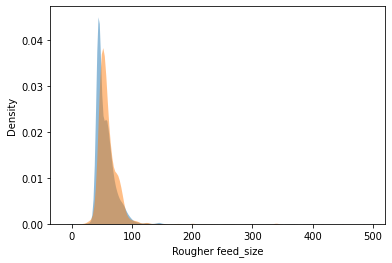

In [21]:
sns.kdeplot(
   data=data_test['rougher.input.feed_size'],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)
sns.kdeplot(
   data=data_train['rougher.input.feed_size'],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)

plt.xlabel('Rougher feed_size');

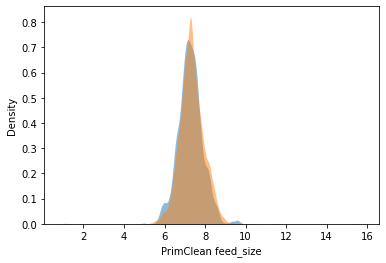

In [22]:
sns.kdeplot(
   data=data_test['primary_cleaner.input.feed_size'],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)
sns.kdeplot(
   data=data_train['primary_cleaner.input.feed_size'],
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)

plt.xlabel('PrimClean feed_size');

**Вывод**

Значения совпадают, модель будет обучаться правильно.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [23]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_final_output = 0

for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += data_train[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += data_train[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_final_output += data_train[f'final.output.concentrate_{metal}']

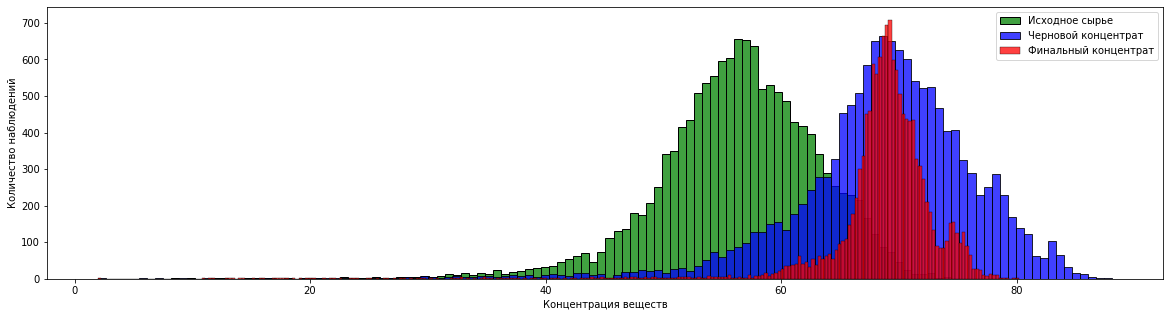

In [24]:
plt.figure(figsize=[20, 5])
sns.histplot(sum_concentrate_of_rougher_input, color = 'g', label = 'Исходное сырье')
sns.histplot(sum_concentrate_of_rougher_output, color = 'b', label = 'Черновой концентрат')
sns.histplot(sum_concentrate_of_final_output, color = 'r', label = 'Финальный концентрат')

plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

**Вывод**

Сумарная концентрация всех веществ увеличивается к финальному этапу, а диапозон уменьшается.

## Построение модели

Напишем функцию для вычисления sMAPE.

In [25]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [26]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

Напишим функцию для вычисления итоговой `sMAPE`.

In [27]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

Разделим признаки на `features_train` и `target_rougher`,`target_final`. Уберем из `data_train` признаки, которые нам не понадобятся.

In [28]:
for_delete = missed_signs - set(['rougher.output.recovery','final.output.recovery'])

In [29]:
data_train = data_train.drop(columns = for_delete, axis=1)

In [30]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']

Масштабируем признаки. 

In [31]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)

Обучим и выберем оптимальную модель.

Модель **LinearRegression** 

In [32]:
%%time
dct_with_scores = {}

model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_rougher,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()


model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_final,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 3.55 s, sys: 5.43 s, total: 8.98 s
Wall time: 8.99 s


Модель **DecisionTreeRegressor**

In [33]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0


for depth in range(1, 11, 1):
    
    model_dt_rougher = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_train,
                              target_rougher,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()
    

    model_dt_final = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    smape_final = cross_val_score(model_dt_final, 
                                  features_train,
                                  target_final,
                                  scoring=smape_scorer,
                                  cv=5)
    
    
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = depth
        
        
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 37.2 s, sys: 14.8 ms, total: 37.2 s
Wall time: 38.5 s


Модель **RandomForestRegressor**

In [ ]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0

for estim in range(10, 100, 30):
    for depth in range(2,6,2):
        
        
        model_rf_rougher = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=12345)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train,
                                  target_rougher,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=12345)
        smape_final = cross_val_score(model_rf_final,
                                features_train,
                                target_final,
                                scoring=smape_scorer,
                                cv=5)
        
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [estim,depth]
            
            
            
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

In [35]:
for key in dct_with_scores.keys():
    print(f'МОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')

МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.09107051018127
МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 8.633445209904176
МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 8.35980812570701


In [36]:
print('ЛУчшие параметры для модели RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))

ЛУчшие параметры для модели RF: N_ESTIMATORS - 70, MAX_DEPTH - 6


Лучше всех себя показала модель `RandomForestRegressor` с параметрами `max_depth` = 10, `n_estimators` = 70.

Применим лучшую модель на тестовой выборке.

In [37]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']

In [38]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=12345)
model_for_test_rougher.fit(features_train_scaled, target_rougher)
predicted_rougher = model_for_test_rougher.predict(features_test)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=12345)
model_for_test_final.fit(features_train_scaled, target_final)
predicted_final = model_for_test_final.predict(features_test)

smape_for_test_rougher = get_smape(target_rougher_test, predicted_rougher)
smape_for_test_final = get_smape(target_final_test, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [39]:
print(f'\nSMAPE Для тестовой выборки - {final_smape_for_test}')


SMAPE Для тестовой выборки - 9.49847327690356


Проверим адекватность модели с помощью `DummyRegressor`.

In [40]:
model = DummyRegressor(strategy = 'mean')

model.fit(features_train_scaled, target_rougher)
predicted_rougher = model.predict(features_test)

model.fit(features_train_scaled, target_final)
predicted_final = model.predict(features_test)

smape_for_test_rougher = get_smape(target_rougher_test, predicted_rougher)
smape_for_test_final = get_smape(target_final_test, predicted_final)
final_smape_for_test_dummy = get_final_smape(smape_for_test_rougher, smape_for_test_final)

print(f'\nSMAPE Константной модели для тестовой выборки - {final_smape_for_test_dummy}')


SMAPE Константной модели для тестовой выборки - 9.832175134712106


Значение константной модели больше выбранной, следовательно, выбранная модель адекватна.

**Вывод:**

При обучении лучше всех себя показала модель: `RandomForestRegressor`, с параметрами:

* `max_depth` = 10

* `n_estimators` = 70

Симметричное среднее абсолютное процентное отклонение, а именно `sMAPE` для тествой выборки – `9.49847327690356`, что в пределах нормы.

Модель адекватна.
        